## 8.2 Preparing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy import signal

In [2]:
from data_loader import load_tokyo_temp
y, m, tokyo = load_tokyo_temp()

utsu_temp = np.genfromtxt("data/Utsunomiya_temp.csv",
                           delimiter=",",
                           usecols=(0, 1, 2)
                          )
utsu = utsu_temp[:, 2]

tokyo = tokyo[(1990 <= y)*(y <=2019)]
utsu = utsu[(1990 <= y)*(y <=2019)]
m = m[(1990 <= y)*(y <=2019)]
y = y[(1990 <= y)*(y <=2019)]



In [6]:
tokyoc = np.zeros([12])
utsuc = np.zeros([12])

for mm in range(1, 13):
    tokyoc[mm-1] = np.nanmean(tokyo[m==mm], 0)
    utsuc[mm-1] = np.nanmean(utsu[m==mm], 0)

tokyoa = np.zeros((tokyo.shape))
utsua = np.zeros((utsu.shape))
for yy in range(1990, 2020):
    for mm in range(1, 13):
        tokyoa[(y==yy)*(m==mm)] = tokyo[(y==yy)*(m==mm)] - tokyoc[mm-1]
        utsua[(y==yy)*(m==mm)] = utsu[(y==yy)*(m==mm)] - utsuc[mm-1]

tokyoa = signal.detrend(tokyoa)
utsua = signal.detrend(utsua)

### 8.3 Calculate Regression coefficients

In [7]:
import matplotlib as mpl


def draw_scatter(x, y, xname, yname):
    plt.scatter(x, y)
    plt.axhline(y=0, xmin=-10, xmax=10, color='k')
    plt.axvline(x=0, ymin=-10, ymax=10, color='k')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.gca().set_aspect('equal', adjustable='box')


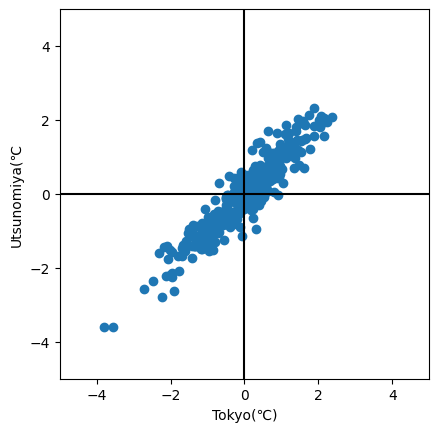

In [8]:
draw_scatter(tokyoa, utsua, 'Tokyo(℃)', 'Utsunomiya(℃')

In [14]:
[a, b] = np.polyfit(tokyoa, utsua, 1)

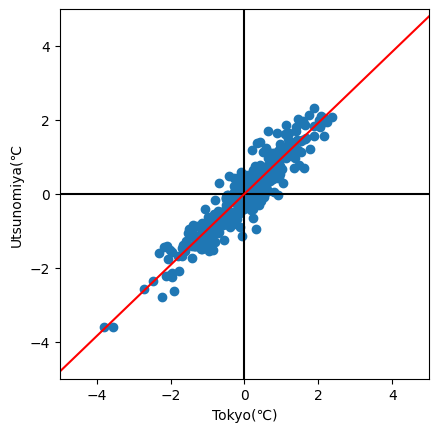

In [15]:
draw_scatter(tokyoa, utsua, 'Tokyo(℃)', 'Utsunomiya(℃')

x = np.array([-10, 10])
plt.plot(x, a*x + b, 'r')
plt.show()

In [16]:
a

0.9620619831036824

In [17]:
b

-2.574611210289581e-16

### 8.4 Correlation coefficient

In [18]:
np.corrcoef(tokyoa, utsua)[1, 0]

0.9385239274981371

In [22]:
np.dot(tokyoa, utsua) / np.sqrt(np.dot(tokyoa, tokyoa) * np.dot(utsua, utsua))

0.9385239274981365

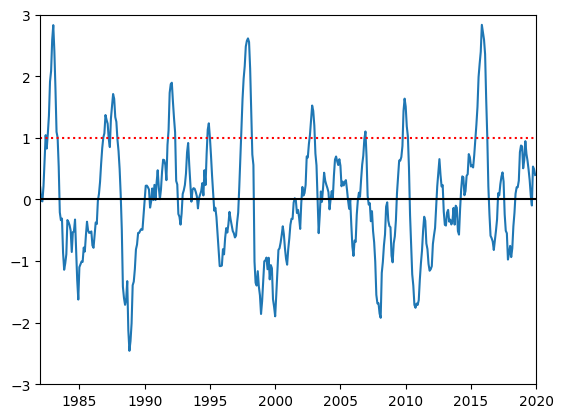

In [16]:
nino34 = aave(190, 240, -5, 5)
plot_2_mon_time(nino34, np.ones(nino34.shape))

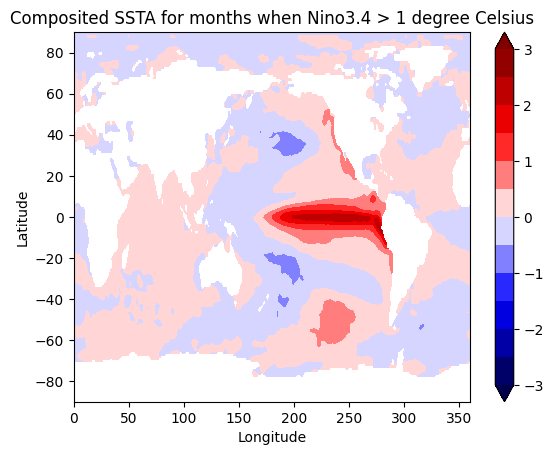

In [25]:
super_nino_data = ssta[:, :, (nino34>1)]

super_nino_composite = np.mean(super_nino_data, 2)

draw_field(super_nino_composite, 'Composited SSTA for months when Nino3.4 > 1 degree Celsius', \
          -3, 3, 0.5)